In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# x -> data, y -> label
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = x_train.shape


In [ ]:
# Scaling the data --> Mean = 0 && Varience = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Crearing the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.3709 - accuracy: 0.8530 - val_loss: 0.3439 - val_accuracy: 0.8989
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3367 - accuracy: 0.8714 - val_loss: 0.3138 - val_accuracy: 0.9096
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.8845 - val_loss: 0.2892 - val_accuracy: 0.9149
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2854 - accuracy: 0.9108 - val_loss: 0.2695 - val_accuracy: 0.9202
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.9160 - val_loss: 0.2534 - val_accuracy: 0.9202
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.9186 - val_loss: 0.2399 - val_accuracy: 0.9309
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.9186 - val_loss: 0.2288 - val_accuracy: 0.9309
Epoch 8/100


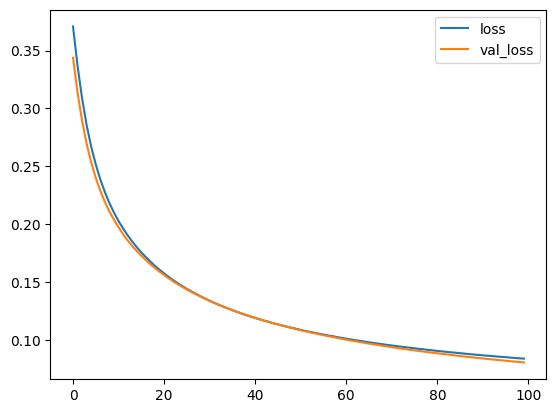

In [ ]:
# Plot -> loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

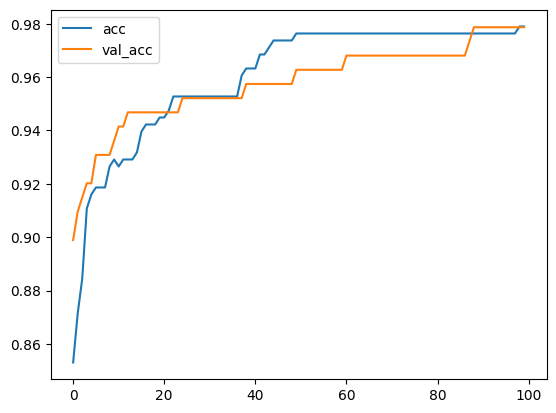

In [ ]:
# Plot -> accu
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()